In [1]:
import datetime
import numpy as np
import pandas as pd

import pickle
import scipy


 # Preparing final dataset with tfidf

In [2]:
MODEL_FOLDER = "data/model"

tfidf_transformer_model = "tfidf_transformer"
count_vectorizer_model = "count_vectorizer"

tfidf_transformer_version = "v1"
count_vectorizer_version = "v1"

INPUT_DATA_FOLDER = "data/merged_dataset"
INPUT_DATA_FILE = "new_features.csv"

In [3]:
df = pd.read_csv(f"{INPUT_DATA_FOLDER}/{INPUT_DATA_FILE}", sep=";")
df.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,keywords,lemm,isAlarm,regions_with_alert,alerts_last_24h,alerts_last_24h_all_reg
0,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
5,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
6,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
7,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
8,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
9,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,...,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN


In [4]:
tfidf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))
cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vectorizer_model}_{count_vectorizer_version}.pkl", "rb"))

In [5]:
word_vector = cv.transform(df['lemm'].values.astype('U'))

In [6]:
tfidf_vector = tfidf.transform(word_vector)

In [7]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

In [8]:
with open("data/model/word_vector.pkl", "wb") as handle:
    pickle.dump(word_vector, handle)
with open("data/model/tfidf_vector.pkl", "wb") as handle:
    pickle.dump(tfidf_vector, handle)

In [9]:
#dt_to_csr = scipy.sparse.csr_matrix(df.values)
#final_matrix = scipy.sparse.hstack([dt_to_csr, tfidf_vector], format = 'csr')

In [10]:
pd.set_option("display.max_columns", None)

In [11]:
df.head(5)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_event_time,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_event_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,keywords,lemm,isAlarm,regions_with_alert,alerts_last_24h,alerts_last_24h_all_reg
0,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,00:00:00,1645740000,0.3,82.68,-2.3,0.0,0.0,0.0,0.0,NaN,25.6,14.4,171.2,1019.0,24.1,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
1,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,01:00:00,1645743600,0.2,83.90,-2.2,0.0,0.0,0.0,0.0,NaN,25.6,14.0,178.3,1019.0,24.1,96.9,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
2,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,02:00:00,1645747200,0.5,84.56,-1.8,0.0,0.0,0.0,0.0,NaN,46.8,11.5,170.0,1017.9,10.0,53.7,NaN,NaN,NaN,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
3,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,03:00:00,1645750800,-0.2,86.37,-2.2,0.0,0.0,0.0,0.0,NaN,23.8,13.0,177.3,1018.0,24.1,65.6,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN
4,"Луцьк, Луцький район, Україна",2022-02-25,1645740000,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,04:00:00,1645754400,-0.3,86.36,-2.3,0.0,0.0,0.0,0.0,NaN,23.0,12.6,176.4,1017.0,24.1,32.0,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'pm': 0.378, 'airport': 0.258, 'kyiv': 0.239,...",russian presid vladimir putin began large-sca...,False,NaN,NaN,NaN


In [12]:
toRemove_1 = ['city_resolvedAddress', 
            'day_datetimeEpoch',
            'day_datetime',
            'hour_conditions',
            'city',
            'center_city_en',
            'center_city_ua',
            'keywords', 
            'lemm']
df_drop_1 = df.drop(toRemove_1, axis=1)
df_drop_1.head(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,region,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_event_time,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_event_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isAlarm,regions_with_alert,alerts_last_24h,alerts_last_24h_all_reg
0,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,00:00:00,1645740000,0.3,82.68,-2.3,0.0,0.0,0.0,0.0,NaN,25.6,14.4,171.2,1019.0,24.1,100.0,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,01:00:00,1645743600,0.2,83.90,-2.2,0.0,0.0,0.0,0.0,NaN,25.6,14.0,178.3,1019.0,24.1,96.9,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,02:00:00,1645747200,0.5,84.56,-1.8,0.0,0.0,0.0,0.0,NaN,46.8,11.5,170.0,1017.9,10.0,53.7,NaN,NaN,NaN,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,03:00:00,1645750800,-0.2,86.37,-2.2,0.0,0.0,0.0,0.0,NaN,23.8,13.0,177.3,1018.0,24.1,65.6,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,04:00:00,1645754400,-0.3,86.36,-2.3,0.0,0.0,0.0,0.0,NaN,23.0,12.6,176.4,1017.0,24.1,32.0,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [13]:

pd.set_option("display.max_rows", None)

In [14]:
df_drop_1.head(10)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,region,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_event_time,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_event_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,isAlarm,regions_with_alert,alerts_last_24h,alerts_last_24h_all_reg
0,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,00:00:00,1645740000,0.3,82.68,-2.3,0.0,0.0,0.0,0.0,NaN,25.6,14.4,171.2,1019.0,24.1,100.0,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,01:00:00,1645743600,0.2,83.90,-2.2,0.0,0.0,0.0,0.0,NaN,25.6,14.0,178.3,1019.0,24.1,96.9,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,02:00:00,1645747200,0.5,84.56,-1.8,0.0,0.0,0.0,0.0,NaN,46.8,11.5,170.0,1017.9,10.0,53.7,NaN,NaN,NaN,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,03:00:00,1645750800,-0.2,86.37,-2.2,0.0,0.0,0.0,0.0,NaN,23.8,13.0,177.3,1018.0,24.1,65.6,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,04:00:00,1645754400,-0.3,86.36,-2.3,0.0,0.0,0.0,0.0,NaN,23.0,12.6,176.4,1017.0,24.1,32.0,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
5,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,05:00:00,1645758000,0.3,83.13,-2.2,0.0,0.0,0.0,0.0,NaN,22.7,12.9,168.0,1016.5,10.0,33.1,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
6,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,06:00:00,1645761600,-0.3,83.22,-2.8,0.0,0.0,0.0,0.0,NaN,23.8,13.3,178.6,1016.0,24.1,96.2,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
7,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,07:00:00,1645765200,-0.3,81.99,-3.0,0.0,0.0,0.0,0.0,NaN,24.1,12.2,183.2,1016.0,24.1,99.7,0.0,NaN,0.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
8,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,08:00:00,1645768800,0.1,85.46,-2.1,0.0,0.0,0.0,0.0,NaN,46.1,10.8,178.0,1015.9,10.0,66.3,NaN,NaN,NaN,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
9,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,07:11:33,17:52:50,0.8,09:00:00,1645772400,1.0,74.08,-3.1,0.0,0.0,0.0,0.0,NaN,23.4,13.0,195.9,1016.0,24.1,83.9,89.0,0.3,1.0,10.0,Волинська,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [15]:
toRemove_2 = [
    'day_sunrise',
    'day_sunset',
    'region_alt',
    'region',
    'event_region_title',
    'event_region_city',
    'event_event_time',
    'event_clean_end',
    'event_start_time',
    'event_end_time',
    'event_intersection_alarm_id',
    'hour_preciptype',
    'hour_datetime',
    'event_start_hour',
    'event_end_hour',
    'event_event_hour',
    'event_hour_level_event_time',
    'event_end',
    'event_day_date'
]
df_drop_2 = df_drop_1.drop(toRemove_2, axis=1)

In [16]:
df_drop_2.head(10)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_moonphase,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,region_id,event_all_region,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_datetimeEpoch,isAlarm,regions_with_alert,alerts_last_24h,alerts_last_24h_all_reg
0,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645740000,0.3,82.68,-2.3,0.0,0.0,0.0,0.0,25.6,14.4,171.2,1019.0,24.1,100.0,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645743600,0.2,83.90,-2.2,0.0,0.0,0.0,0.0,25.6,14.0,178.3,1019.0,24.1,96.9,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645747200,0.5,84.56,-1.8,0.0,0.0,0.0,0.0,46.8,11.5,170.0,1017.9,10.0,53.7,NaN,NaN,NaN,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
3,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645750800,-0.2,86.37,-2.2,0.0,0.0,0.0,0.0,23.8,13.0,177.3,1018.0,24.1,65.6,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
4,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645754400,-0.3,86.36,-2.3,0.0,0.0,0.0,0.0,23.0,12.6,176.4,1017.0,24.1,32.0,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
5,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645758000,0.3,83.13,-2.2,0.0,0.0,0.0,0.0,22.7,12.9,168.0,1016.5,10.0,33.1,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
6,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645761600,-0.3,83.22,-2.8,0.0,0.0,0.0,0.0,23.8,13.3,178.6,1016.0,24.1,96.2,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
7,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645765200,-0.3,81.99,-3.0,0.0,0.0,0.0,0.0,24.1,12.2,183.2,1016.0,24.1,99.7,0.0,NaN,0.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
8,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645768800,0.1,85.46,-2.1,0.0,0.0,0.0,0.0,46.1,10.8,178.0,1015.9,10.0,66.3,NaN,NaN,NaN,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
9,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,0.8,1645772400,1.0,74.08,-3.1,0.0,0.0,0.0,0.0,23.4,13.0,195.9,1016.0,24.1,83.9,89.0,0.3,1.0,10.0,3,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN


In [17]:
#df_csr = scipy.sparse.csr_matrix(df_drop_2.values)
#final_matrix = scipy.sparse.hstack([df_csr, tfidf_vector], format = 'csr')

In [18]:
df_drop_2.dtypes

day_tempmax                             float64
day_tempmin                             float64
day_temp                                float64
day_dew                                 float64
day_humidity                            float64
day_precip                              float64
day_precipcover                         float64
day_solarradiation                      float64
day_solarenergy                         float64
day_uvindex                             float64
day_moonphase                           float64
hour_datetimeEpoch                        int64
hour_temp                               float64
hour_humidity                           float64
hour_dew                                float64
hour_precip                             float64
hour_precipprob                         float64
hour_snow                               float64
hour_snowdepth                          float64
hour_windgust                           float64
hour_windspeed                          

In [19]:
#test.head(10)

In [20]:
#df = pd.concat([df_drop_2.reset_index(drop=True),test.reset_index(drop=True)], axis=1)

In [21]:
df_drop_2.to_csv("data/merged_dataset/df_drop_2.csv", sep=";", index=False)


In [22]:
tfidf_vector = pickle.load(open('data/model/tfidf_vector.pkl', "rb"))
df_drop_2f = pd.read_csv("data/merged_dataset/df_drop_2.csv", sep=";")

In [23]:
type(tfidf_vector)

scipy.sparse._csr.csr_matrix

In [24]:
tfidf_df = pd.DataFrame(tfidf_vector.todense())

In [25]:
#tfidf_df.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
7       float64
8       float64
9       float64
10      float64
11      float64
12      float64
13      float64
14      float64
15      float64
16      float64
17      float64
18      float64
19      float64
20      float64
21      float64
22      float64
23      float64
24      float64
25      float64
26      float64
27      float64
28      float64
29      float64
30      float64
31      float64
32      float64
33      float64
34      float64
35      float64
36      float64
37      float64
38      float64
39      float64
40      float64
41      float64
42      float64
43      float64
44      float64
45      float64
46      float64
47      float64
48      float64
49      float64
50      float64
51      float64
52      float64
53      float64
54      float64
55      float64
56      float64
57      float64
58      float64
59      float64
60      float64
61      float64
62      

In [26]:
tfidf_df_float32 = tfidf_df.astype(np.float32)

In [27]:
#tfidf_df_float32.dtypes

0       float32
1       float32
2       float32
3       float32
4       float32
5       float32
6       float32
7       float32
8       float32
9       float32
10      float32
11      float32
12      float32
13      float32
14      float32
15      float32
16      float32
17      float32
18      float32
19      float32
20      float32
21      float32
22      float32
23      float32
24      float32
25      float32
26      float32
27      float32
28      float32
29      float32
30      float32
31      float32
32      float32
33      float32
34      float32
35      float32
36      float32
37      float32
38      float32
39      float32
40      float32
41      float32
42      float32
43      float32
44      float32
45      float32
46      float32
47      float32
48      float32
49      float32
50      float32
51      float32
52      float32
53      float32
54      float32
55      float32
56      float32
57      float32
58      float32
59      float32
60      float32
61      float32
62      

In [28]:
df = pd.concat([df_drop_2f.reset_index(drop=True),tfidf_df_float32.reset_index(drop=True)], axis=1)

In [29]:
df.shape

(191095, 7422)

In [30]:
df.to_csv("data/merged_dataset/all_info_with_tfidf.csv", sep=";", index=False)

In [31]:
df.head(2)

day_tempmax  day_tempmin  day_temp  day_dew  day_humidity  day_precip  \
0          6.3         -0.3       2.2     -1.2          78.3         0.2   
1          6.3         -0.3       2.2     -1.2          78.3         0.2   

   day_precipcover  day_solarradiation  day_solarenergy  day_uvindex  \
0             8.33                45.7              3.3          2.0   
1             8.33                45.7              3.3          2.0   

   day_moonphase  hour_datetimeEpoch  hour_temp  hour_humidity  hour_dew  \
0            0.8          1645740000        0.3          82.68      -2.3   
1            0.8          1645743600        0.2          83.90      -2.2   

   hour_precip  hour_precipprob  hour_snow  hour_snowdepth  hour_windgust  \
0          0.0              0.0        0.0             0.0           25.6   
1          0.0              0.0        0.0             0.0           25.6   

   hour_windspeed  hour_winddir  hour_pressure  hour_visibility  \
0            14.4         171.2         1019.0             24.1   
1            14.0         178.3         1019.0             24.1   

   hour_cloudcover  hour_solarradiation  hour_solarenergy  hour_uvindex  \
0            100.0                  0.0               NaN           0.0   
1             96.9                  0.0               NaN           0.0   

   hour_severerisk  region_id  event_all_region  \
0             10.0          3               NaN   
1             10.0          3               NaN   

   event_start_hour_datetimeEpoch  event_end_hour_datetimeEpoch  \
0                             NaN                           NaN   
1                             NaN                           NaN   

   event_hour_level_event_datetimeEpoch  isAlarm  regions_with_alert  \
0                                   NaN    False                 NaN   
1                                   NaN    False                 NaN   

   alerts_last_24h  alerts_last_24h_all_reg    0    1    2    3    4    5  \
0              NaN                      NaN  0.0  0.0  0.0  0.0  0.0  0.0   
1              NaN                      NaN  0.0  0.0  0.0  0.0  0.0  0.0   

     6    7    8    9   10   11   12   13   14   15   16   17   18   19   20  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    21   22   23   24   25   26   27   28   29   30   31   32   33   34   35  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    36   37   38   39   40   41   42   43   44   45   46   47   48   49   50  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    51   52   53   54   55   56   57   58   59   60   61   62   63   64   65  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    66   67   68   69   70   71   72   73   74   75   76   77   78   79   80  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         81   82   83   84   85   86   87   88   89   90   91   92   93   94  \
0  0.039136  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.039136  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    95   96   97   98   99  100  101  102  103  104  105  106  107  108  109  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0

# Separate data: train & test.

In [3]:
import SeparateData
x_train_df, y_train_df, x_test_df, y_test_df = SeparateData.separate();

In [4]:
remove_event = [
    'event_all_region',
    'event_start_hour_datetimeEpoch',
    'event_end_hour_datetimeEpoch',
    'event_hour_level_event_datetimeEpoch'
]
x_train_df = x_train_df.drop(remove_event, axis=1)
x_test_df = x_test_df.drop(remove_event, axis=1)
x_train_df.head(10)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,...,7374,7375,7376,7377,7378,7379,7380,7381,7382,7383
0,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
1,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
2,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
3,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
4,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
5,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
6,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
7,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
8,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0
9,6.3,-0.3,2.2,-1.2,78.3,0.2,8.33,45.7,3.3,2.0,...,0.0,0.0,0.0,0.062207,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
x_train_df = x_train_df.fillna(0)
x_train_df.columns = x_train_df.columns.astype(str)
x_test_df = x_test_df.fillna(0)
x_test_df.columns = x_test_df.columns.astype(str)

In [6]:
x_train_df['hour_datetimeEpoch'].max()

1667120400

In [7]:
x_test_df['hour_datetimeEpoch'].min()

1667124000

# Logistic Regression(Full size train)

In [44]:
import sklearn.linear_model as sk
modelLR = sk.LogisticRegression()
modelLR.fit(x_train_df, y_train_df)

LogisticRegression()

In [48]:
import sklearn.metrics as skm
predicted = modelLR.predict(x_test_df)
skm.accuracy_score(predicted.astype('int').astype(bool),y_test_df)

0.8401481184054964

In [46]:
skm.confusion_matrix(predicted.astype('int').astype(bool), y_test_df)

array([[37663,  7166],
       [    0,     0]], dtype=int64)

In [47]:
skm.average_precision_score(predicted.astype('int').astype(bool), y_test_df)

C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


-0.0

In [48]:
skm.f1_score(predicted.astype('int').astype(bool), y_test_df)

0.0

In [49]:
with open(f"{MODEL_FOLDER}/modelLR.pkl", "wb") as handle:
    pickle.dump(modelLR, handle)

# Support Vector Machines(20k train)

In [32]:
import sklearn.svm as svm
modelSVC = svm.SVC()
modelSVC.fit(x_train_df, y_train_df)

SVC()

In [33]:
predicted = modelSVC.predict(x_test_df)
skm.accuracy_score(predicted, y_test_df)

0.490234375

In [34]:
skm.confusion_matrix(predicted, y_test_df)

array([[2259, 2349],
       [   0,    0]], dtype=int64)

In [35]:
skm.average_precision_score(predicted, y_test_df)

C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


-0.0

In [36]:
skm.f1_score(predicted, y_test_df)

0.0

In [37]:
with open(f"{MODEL_FOLDER}/modelSVC.pkl", "wb") as handle:
    pickle.dump(modelSVC, handle)

# Stochastic Gradient Descent(Full size train)

In [6]:
import sklearn.linear_model as sk
modelSGD = sk.SGDClassifier()
modelSGD.fit(x_train_df, y_train_df)

SGDClassifier()

In [7]:
import sklearn.metrics as skm
predicted = modelSGD.predict(x_test_df)
skm.accuracy_score(predicted, y_test_df)

0.15985188159450356

In [8]:
skm.confusion_matrix(predicted, y_test_df)

array([[    0,     0],
       [37663,  7166]], dtype=int64)

In [9]:
skm.average_precision_score(predicted, y_test_df)

1.0

In [10]:
skm.f1_score(predicted, y_test_df)

0.27564188864313877

In [11]:
with open(f"{MODEL_FOLDER}/modelSGD.pkl", "wb") as handle:
    pickle.dump(modelSGD, handle)

# Forests of randomized trees(Full size train)

In [12]:
import sklearn.ensemble as ske
modelRF = ske.RandomForestClassifier()
modelRF.fit(x_train_df, y_train_df)

RandomForestClassifier()

In [13]:
predicted = modelRF.predict(x_test_df)
skm.accuracy_score(predicted, y_test_df)

0.9805929197617613

In [14]:
skm.confusion_matrix(predicted, y_test_df)

array([[37663,   870],
       [    0,  6296]], dtype=int64)

In [15]:
skm.average_precision_score(predicted, y_test_df)

0.8785933575216299

In [16]:
skm.f1_score(predicted, y_test_df)

0.9353736443321943

In [17]:
with open(f"{MODEL_FOLDER}/modelRF.pkl", "wb") as handle:
    pickle.dump(modelRF, handle)

# Bayesian Ridge(Full size train)

In [18]:
modelBR = sk.BayesianRidge()
modelBR.fit(x_train_df, y_train_df)

BayesianRidge()

In [32]:
predicted = modelBR.predict(x_test_df)

In [34]:
skm.confusion_matrix(predicted.astype('int').astype(bool), y_test_df)

array([[37663,  6542],
       [    0,   624]], dtype=int64)

In [35]:
skm.accuracy_score(predicted.astype('int').astype(bool), y_test_df)

0.8540676794039572

In [36]:
skm.average_precision_score(predicted.astype('int').astype(bool), y_test_df)

0.08707786770862405

In [23]:
skm.f1_score(predicted.astype('int').astype(bool), y_test_df)

0.16020539152759947

In [24]:
with open(f"{MODEL_FOLDER}/modelBR.pkl", "wb") as handle:
    pickle.dump(modelBR, handle)

# Linear Regression(Full size train)

In [25]:
modelLinR = sk.LinearRegression()
modelLinR.fit(x_train_df, y_train_df)

LinearRegression()

In [26]:
predicted = modelLinR.predict(x_test_df)

In [27]:
skm.confusion_matrix(predicted.astype('int').astype(bool), y_test_df)

array([[ 5029,  4129],
       [32634,  3037]], dtype=int64)

In [28]:
skm.accuracy_score(predicted.astype('int').astype(bool), y_test_df)

0.17992817149612975

In [29]:
skm.average_precision_score(predicted.astype('int').astype(bool), y_test_df)

0.7640488445474335

In [30]:
skm.f1_score(predicted.astype('int').astype(bool), y_test_df)

0.14179330952214206

In [31]:
with open(f"{MODEL_FOLDER}/modelLinR.pkl", "wb") as handle:
    pickle.dump(modelLinR, handle)

# Tuning the hyper-parameters

In [6]:
modelRF = pickle.load(open(f"{MODEL_FOLDER}/modelRF.pkl", "rb"))
modelRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
modelBR = pickle.load(open(f"{MODEL_FOLDER}/modelBR.pkl", "rb"))
modelBR.get_params()

{'alpha_1': 1e-06,
 'alpha_2': 1e-06,
 'alpha_init': None,
 'compute_score': False,
 'copy_X': True,
 'fit_intercept': True,
 'lambda_1': 1e-06,
 'lambda_2': 1e-06,
 'lambda_init': None,
 'n_iter': 300,
 'tol': 0.001,
 'verbose': False}

In [8]:
modelLR = pickle.load(open(f"{MODEL_FOLDER}/modelLR.pkl", "rb"))
modelLR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = [
    {
    'solver' : ['lbfgs','newton-cg']
    }
]
clf = GridSearchCV(modelLR, param_grid = param_grid)

In [15]:
best_clf = clf.fit(x_train_df, y_train_df)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 6.47 GiB for an array with shape (117012, 7417) and data type float64

--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "C:\Users\PC\PycharmProjects\pythonProject1\venv\lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 6.47 GiB for an array with shape (117013, 7417) and data type float64


In [45]:
test = modelLR.coef_
type(test)
np.rot90(test)

array([[-7.92075234e-23],
       [-7.92075234e-23],
       [-2.19957988e-22],
       ...,
       [-8.66974545e-18],
       [-6.87750740e-18],
       [-1.03271266e-17]])

In [47]:
modelRF.feature_importances_
testdf=pd.DataFrame(modelRF.feature_importances_, columns = ['num','importance'])
testdf

ValueError: Shape of passed values is (7417, 1), indices imply (7417, 2)

In [22]:
modelBR.coef_

array([-0.00336841,  0.0037    , -0.01198498, ...,  0.00285575,
        0.00375031,  0.00375031])

In [49]:
predicted

array([False, False, False, ..., False, False, False])

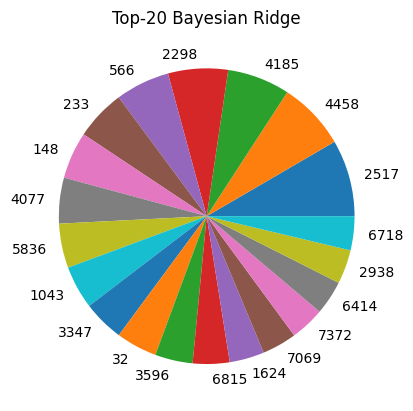

In [64]:
import matplotlib.pyplot as plt

data = {
    2517: 0.096927,
    4458: 0.085790,
    4185: 0.079020,
    2298: 0.075628,
    566: 0.068375,
    233: 0.063685,
    148: 0.059378,
    4077: 0.057729,
    5836: 0.056080,
    1043: 0.054470,
    3347: 0.051909,
    32: 0.051735,
    3596: 0.047582,
    6815: 0.046373,
    1624: 0.043888,
    7069: 0.043662,
    7372: 0.043227,
    6414: 0.043120,
    2938: 0.043024,
    6718: 0.042899
}

# Create a list of labels for the pie chart
labels = [str(k) for k in data.keys()]

# Create a list of values for the pie chart
values = list(data.values())

# Create a pie chart
plt.pie(values, labels=labels)

# Add a title
plt.title('Top-20 Bayesian Ridge')

# Show the chart
plt.show()

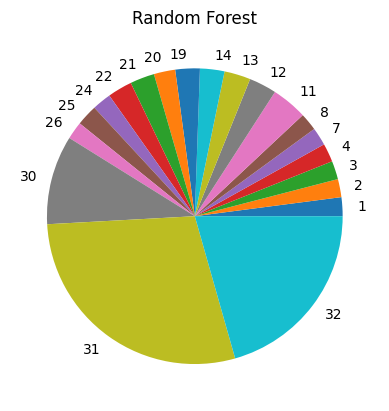

In [56]:
import matplotlib.pyplot as plt

data = {
    31: 0.231884,
    32: 0.167403,
    30: 0.079132,
    11: 0.031721,
    12: 0.024547,
    13: 0.023365,
    22: 0.021803,
    19: 0.021764,
    14: 0.021722,
    21: 0.021710,
    20: 0.018989,
    25: 0.018770,
    24: 0.016870,
    1: 0.016754,
    4: 0.016426,
    3: 0.016370,
    2: 0.016077,
    7: 0.015994,
    26: 0.015698,
    8: 0.015694
}

# Create a sorted list of the dictionary's keys
keys = sorted(data.keys())

# Create a list of labels for the pie chart
labels = [str(k) for k in keys]

# Create a list of values for the pie chart
values = [data[k] for k in keys]

# Create a pie chart
plt.pie(values, labels=labels)

# Add a title
plt.title('Random Forest')

# Show the chart
plt.show()

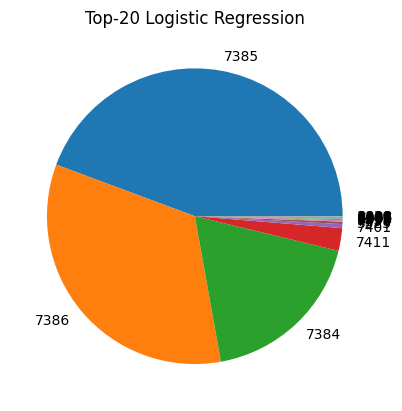

In [61]:
data = {
    7385: 1.854933e-17,
    7386: 1.401596e-17,
    7384: 7.700789e-18,
    7411: 1.038681e-18,
    7401: 1.832918e-19,
    3525: 1.099056e-19,
    7398: 6.668999e-20,
    3791: 4.350458e-20,
    6095: 1.739170e-20,
    3231: 1.545958e-20,
    1002: 1.317748e-20,
    4394: 1.294056e-20,
    7305: 1.134307e-20,
    42: 1.047695e-20,
    4061: 1.040025e-20,
    6483: 9.894251e-21,
    1081: 9.344250e-21,
    3105: 8.987943e-21,
    6298: 7.943663e-21,
    3410: 7.912942e-21,
}

# Create a list of labels for the pie chart
labels = [str(k) for k in data.keys()]

# Create a list of values for the pie chart
values = list(data.values())

# Create a pie chart
plt.pie(values, labels=labels)

# Add a title
plt.title('Top-20 Logistic Regression')

# Show the chart
plt.show()

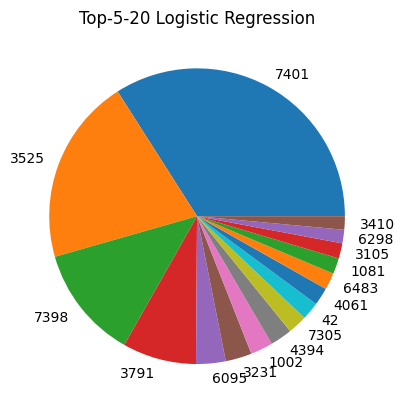

In [63]:
import matplotlib.pyplot as plt

# Data
values = [1.832918e-19, 1.099056e-19, 6.668999e-20, 4.350458e-20, 1.739170e-20, 1.545958e-20,
          1.317748e-20, 1.294056e-20, 1.134307e-20, 1.047695e-20, 1.040025e-20, 9.894251e-21,
          9.344250e-21, 8.987943e-21, 7.943663e-21, 7.912942e-21]

# Labels
labels = ['7401', '3525', '7398', '3791', '6095', '3231', '1002', '4394', '7305', '42', '4061',
          '6483', '1081', '3105', '6298', '3410']

# Plot
plt.pie(values, labels=labels)
plt.title('Top-5-20 Logistic Regression')
# Show plot
plt.show()